# Word2vec表示
目的：自然语言处理相关任务中要将自然语言交给机器学习中的算法来处理，通常需要将语言数学化，因为机器不是人，机器只认数学符号。向量是人把自然界的东西抽象出来交给机器处理的东西，基本上可以说向量是人对机器输入的主要方式了。  
　　词向量就是用来将语言中的词进行数学化的一种方式，顾名思义，词向量就是把一个词表示成一个向量。我们都知道词在送到神经网络训练之前需要将其编码成数值变量，常见的编码方式有两种：One-Hot Representation 和 Distributed Representation

OneHot编码的缺点:

- **容易受维数灾难的困扰，尤其是将其用于 Deep Learning的一些算法时**  
当你的词汇量达到千万甚至上亿级别的时候,你会遇到一个更加严重的问题,维度爆炸了.这里举例使用的是个词,你会发现,我们使用了四个维度,当词数量达到千万的时候,词向量的大小变成了千万维,不说别的,光内存你都受不了这么大的词向量,假设你使用一个bit来表示每一维,那么一个单词大概需要0.12GB的内存,但是注意这只是一个词,一共会有上千万的词,这样内存爆炸了。
- **词汇鸿沟，不能很好地刻画词与词之间的相似性**  
任意两个词之间都是孤立的，从这两个向量中看不出两个词是否有关系。比如说，I、like之间的关系和like、writing之间的关系,通过0001和0010和0010和0100怎么表现,通过距离?通过1的位置?你会发现独热编码完全没法表现单词之间的任何关系。
- **强稀疏性**  
当维度过度增长的时候,你会发现0特别多,这样造成的后果就是整个向量中有用的信息特别少,几乎就没法做计算。
由于One-hot编码存在以上种种问题，所以研究者就会寻求发展，用另外的方式表示，就是Distributed Representation。

# gensim包学习

In [1]:
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
import logging
import os
from gensim.models import word2vec

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',  # 设置字体类型
}
rcParams.update(config)

In [2]:
jieba.suggest_freq('沙瑞金', True)
jieba.suggest_freq('田国富', True)
jieba.suggest_freq('高育良', True)
jieba.suggest_freq('侯亮平', True)
jieba.suggest_freq('钟小艾', True)
jieba.suggest_freq('陈岩石', True)
jieba.suggest_freq('欧阳菁', True)
jieba.suggest_freq('易学习', True)
jieba.suggest_freq('王大路', True)
jieba.suggest_freq('蔡成功', True)
jieba.suggest_freq('孙连城', True)
jieba.suggest_freq('季昌明', True)
jieba.suggest_freq('丁义珍', True)
jieba.suggest_freq('郑西坡', True)
jieba.suggest_freq('赵东来', True)
jieba.suggest_freq('高小琴', True)
jieba.suggest_freq('赵瑞龙', True)
jieba.suggest_freq('林华华', True)
jieba.suggest_freq('陆亦可', True)
jieba.suggest_freq('刘新建', True)
jieba.suggest_freq('刘庆祝', True)

with open('./imgs/in_the_name_of_people.txt') as f:
    
    document = f.read()    
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    with open('./imgs/in_the_name_of_people_segment.txt', 'w') as f2:
        f2.write(result)
        
f.close()
f2.close()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built successfully.


In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = word2vec.LineSentence('./imgs/in_the_name_of_people_segment.txt') 

model = word2vec.Word2Vec(sentences
                          , sg=1
                          , min_count=1
                          , window=3
                          , size=100
                         )

2021-05-15 10:24:34,404 : INFO : collecting all words and their counts
2021-05-15 10:24:34,407 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-15 10:24:34,476 : INFO : collected 17878 word types from a corpus of 161343 raw words and 2311 sentences
2021-05-15 10:24:34,477 : INFO : Loading a fresh vocabulary
2021-05-15 10:24:34,528 : INFO : effective_min_count=1 retains 17878 unique words (100% of original 17878, drops 0)
2021-05-15 10:24:34,530 : INFO : effective_min_count=1 leaves 161343 word corpus (100% of original 161343, drops 0)
2021-05-15 10:24:34,608 : INFO : deleting the raw counts dictionary of 17878 items
2021-05-15 10:24:34,612 : INFO : sample=0.001 downsamples 38 most-common words
2021-05-15 10:24:34,614 : INFO : downsampling leaves estimated 120578 word corpus (74.7% of prior 161343)
2021-05-15 10:24:34,662 : INFO : estimated required memory for 17878 words and 100 dimensions: 23241400 bytes
2021-05-15 10:24:34,663 : INFO : resetting laye

In [4]:
# 最相似的topk个token
model.wv.similar_by_word("李达康", topn=5)

2021-05-15 10:24:40,126 : INFO : precomputing L2-norms of word weight vectors


[('祁同伟', 0.9853172302246094),
 ('赵东来', 0.9843684434890747),
 ('季昌明', 0.9813350439071655),
 ('郑西坡', 0.9779636859893799),
 ('田国富', 0.9776411056518555)]

In [5]:
# 两个word的相似度
model.wv.similarity("高育良", "王大路")

0.9008845

<AxesSubplot:>

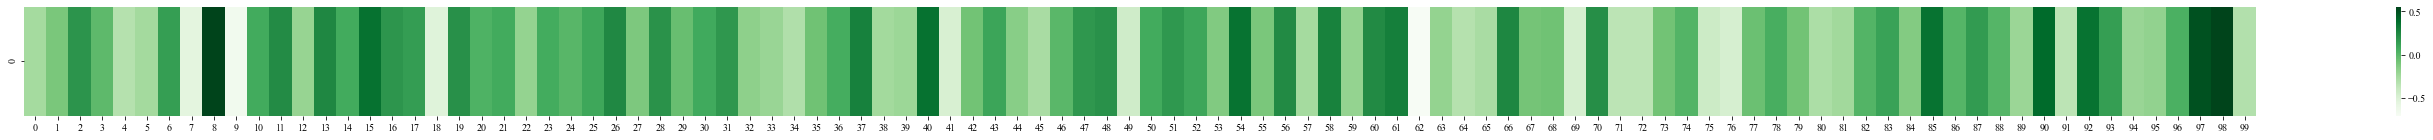

In [6]:
plt.figure(figsize=(50, 2))
sns.heatmap(model.wv["高育良"].reshape(1, 100), cmap="Greens", cbar=True)

<AxesSubplot:>

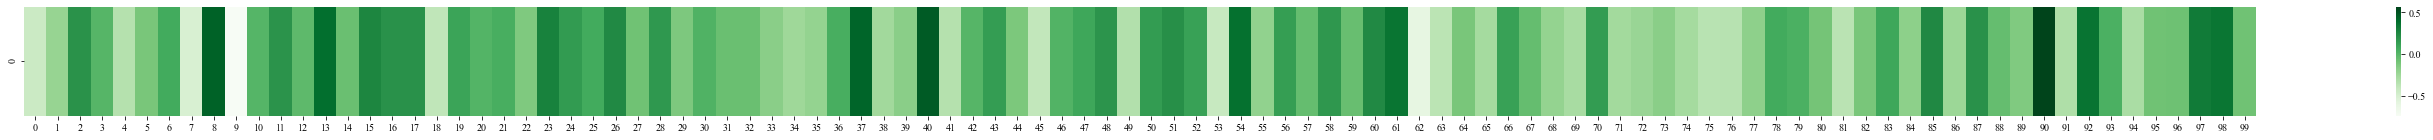

In [7]:
plt.figure(figsize=(50, 2))
sns.heatmap(model.wv["王大路"].reshape(1, 100), cmap="Greens", cbar=True)

In [8]:
# 不是一伙人
model.wv.doesnt_match("沙瑞金 高育良 李达康 刘庆祝".strip().split())

/home/gavin/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'刘庆祝'

# Word2Vec源码学习
模型：基于Neggative Sampling的Skip-gram模型。

In [9]:
import collections
import math
import random
import sys
import time
import os
import numpy as np
import torch
from torch import nn
import torch.utils.data as Data
import matplotlib.pyplot as plt
import faiss


sys.path.append("..") 
import d2lzh_pytorch as d2l
print(torch.__version__)

2021-05-15 10:24:44,015 : INFO : Loading faiss with AVX2 support.


1.8.1+cu102


## 处理数据集

In [10]:
assert 'ptb.train.txt' in os.listdir("../../data/ptb")

In [11]:
with open('../../data/ptb/ptb.train.txt', 'r') as f:
    lines = f.readlines()
    # st是sentence的缩写
    # 读取每一行的单词
    raw_dataset = [st.split() for st in lines]

'# sentences: %d' % len(raw_dataset)

'# sentences: 42068'

In [12]:
for st in raw_dataset[:3]:
    print('# tokens:', len(st), st[:5])

# tokens: 24 ['aer', 'banknote', 'berlitz', 'calloway', 'centrust']
# tokens: 15 ['pierre', '<unk>', 'N', 'years', 'old']
# tokens: 11 ['mr.', '<unk>', 'is', 'chairman', 'of']


### 建立词语索引（低频次的处理）
![](./imgs/min_count.png)

In [13]:
# tk是token的缩写
# 构建词表, 单词出现次数不少于五次（min_count）, 低频词的处理
counter = collections.Counter([tk for st in raw_dataset for tk in st])
counter = dict(filter(lambda x: x[1] >= 5, counter.items()))

In [14]:
"""
counter数据格式
{'pierre': 6,
 '<unk>': 45020,
 'N': 32481,
 'years': 1241,
 'old': 268,
 """
# 建立key与索引值的对应关系
idx_to_token = [tk for tk, _ in counter.items()]
token_to_idx = {tk: idx for idx, tk in enumerate(idx_to_token)}

In [15]:
len(idx_to_token)

9858

In [16]:
# dataset转变为带有id值表示的词典
dataset = [[token_to_idx[tk] for tk in st if tk in token_to_idx]
           for st in raw_dataset]

# num_tokens表示总出现的词的个数
num_tokens = sum([len(st) for st in dataset])
'# tokens: %d' % num_tokens

'# tokens: 887100'

In [17]:
# 将词变为数字索引
dataset[1:3]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2],
 [14, 1, 15, 16, 17, 1, 18, 7, 19, 20, 21]]

###  二次采样（高频词的处理）
![](./imgs/sample.png)

In [18]:
# 随机值
random.uniform(0, 1)

0.13044269722038493

In [19]:
def discard(idx):
    """丢弃一部分高频词"""
    
    return random.uniform(0, 1) < 1 - math.sqrt(
        1e-4 / counter[idx_to_token[idx]] * num_tokens)

subsampled_dataset = [[tk for tk in st if not discard(tk)] for st in dataset]
'# tokens: %d' % sum([len(st) for st in subsampled_dataset])

'# tokens: 375873'

In [20]:
# 采样后数据内容
subsampled_dataset[1:3]

[[0, 2, 4, 6, 8, 11], [16, 18, 7, 19, 20]]

In [21]:
#　比较次数
def compare_counts(token):
    
    return '# %s: before=%d, after=%d' % (token, sum(
        [st.count(token_to_idx[token]) for st in dataset]), sum(
        [st.count(token_to_idx[token]) for st in subsampled_dataset]))

compare_counts('the')

'# the: before=50770, after=2145'

In [22]:
compare_counts('join')

'# join: before=45, after=45'

### 提取中心词和背景词
![](./imgs/window.png)

In [23]:
def get_centers_and_contexts(dataset, max_window_size):
    
    centers, contexts = [], []
    for st in dataset:
        if len(st) < 2:  # 每个句子至少要有2个词才可能组成一对“中心词-背景词”
            continue
        centers += st
        for center_i in range(len(st)):
            window_size = random.randint(1, max_window_size)
            indices = list(range(max(0, center_i - window_size),
                                 min(len(st), center_i + 1 + window_size)))
            indices.remove(center_i)  # 将中心词排除在背景词之外
            contexts.append([st[idx] for idx in indices])
            
    return centers, contexts

In [24]:
tiny_dataset = [list(range(7)), list(range(7, 10))]
print('dataset', tiny_dataset)
for center, context in zip(*get_centers_and_contexts(tiny_dataset, 2)):
    print('center', center, 'has contexts', context)

dataset [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9]]
center 0 has contexts [1]
center 1 has contexts [0, 2, 3]
center 2 has contexts [0, 1, 3, 4]
center 3 has contexts [2, 4]
center 4 has contexts [2, 3, 5, 6]
center 5 has contexts [4, 6]
center 6 has contexts [4, 5]
center 7 has contexts [8]
center 8 has contexts [7, 9]
center 9 has contexts [8]


In [25]:
all_centers, all_contexts = get_centers_and_contexts(subsampled_dataset, 5)

In [26]:
# [center] [context]
all_centers[1], all_contexts[1]

(2, [0, 4])

##  负采样算法(Negative Sampling)
采样思想：  
首先采样的数量根据数据集的大小而定，一个经验是<font color = red>对于小数据集，选择 5-20 个负例，而对于较大的数据集，则只需要 2-5个负例就可以</font>。另外，采样会遵循一定的分布，这里用的是一元模型分布 (unigram distribution)，它的特点是词频更高的词更有可能被选为负例，是一个加权采样。

![](./imgs/negs.png)


### 负采样采样概率

负采样频率设计目的:  
加入词频率的0.75次幂，稍微增加低频词的采样概率，降低高频词的采样概率, 对高频词汇进行降采样避免对于这些低信息词汇的无谓计算，同时避免高频词汇对模型造成过大的影响.
$$
P(w_i) = \frac{counter(w_i)^{\frac{3}{4}}}{\sum_{w_i\in{D}} counter(w_i)^{\frac{3}{4}}}
$$

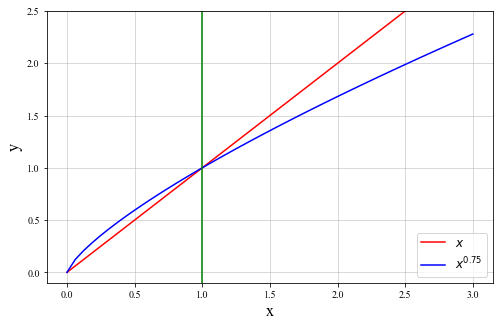

In [27]:
x = np.linspace(0, 3, 50)
y_fr = x**0.75
plt.figure(figsize=(8, 5))
plt.plot(x, x, 'r', label = "$x$")
plt.plot(x, y_fr, 'b', label = "$x^{0.75}$")
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)
plt.axvline(x = 1.0, color="g")
plt.ylim([-0.1, 2.5])
plt.legend(loc=4, fontsize = 12)
plt.grid(alpha = 0.6)
plt.show()

### 负采样代码

目标:为每一个正样本采样若干个负样本来进行参数学习。  
![](./imgs/neg_sample.png)

In [28]:
def get_negatives(all_contexts, sampling_weights, K):
    """
    all_contexts: 上下文词
    sampling_weights: 采样权重
    K: 负采样个数
    """
    
    all_negatives, neg_candidates, i = [], [], 0
    # 词个数
    population = list(range(len(sampling_weights)))
    for contexts in all_contexts:
        negatives = []
        #  每一个正样本采样K个负样本
        while len(negatives) < len(contexts) * K:
            if i == len(neg_candidates):
                # 根据每个词的权重（sampling_weights）随机生成k个词的索引作为噪声词。
                # 为了高效计算，可以将k设得稍大一点
                i, neg_candidates = 0, random.choices(
                    population, sampling_weights, k=int(1e5))
                
            neg, i = neg_candidates[i], i + 1
            # 噪声词不能是背景词
            if neg not in set(contexts):
                negatives.append(neg)
                
        all_negatives.append(negatives)
        
    return all_negatives

# 统计每一个词的词频（出现次数），简化计算，被除数相同
sampling_weights = [counter[w]**0.75 for w in idx_to_token]  # 分子
all_negatives = get_negatives(all_contexts, sampling_weights, 5)

In [29]:
all_negatives[1]

[5, 4088, 3099, 6001, 341, 1094, 5015, 2, 3622, 53]

###  二元交叉熵损失函数
损失函数：
$$
E = - log\sigma({v^{'}_o}^Th) - \sum_{w_j\in{W_{neg}}}log{\sigma(-v_{w_j}^Th})
$$

In [30]:
class SigmoidBinaryCrossEntropyLoss(nn.Module):
    
    def __init__(self): # none mean sum
        
        super(SigmoidBinaryCrossEntropyLoss, self).__init__()
        
    def forward(self, inputs, targets, mask=None):
        """
        input – Tensor shape: (batch_size, len)
        target – Tensor of the same shape as input
        """
        
        inputs, targets, mask = inputs.float(), targets.float(), mask.float()
        res = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction="none", weight=mask)
        
        return res.mean(dim=1)

loss = SigmoidBinaryCrossEntropyLoss()

In [31]:
pred = torch.tensor([[1.5, 0.3, -1, 2], [1.1, -0.6, 2.2, 0.4]])
# 标签变量label中的1和0分别代表背景词和噪声词
label = torch.tensor([[1, 0, 0, 0], [1, 1, 0, 0]])
mask = torch.tensor([[1, 1, 1, 1], [1, 1, 1, 0]])  # 掩码变量

loss(pred, label, mask) * mask.shape[1] / mask.float().sum(dim=1)

tensor([0.8740, 1.2100])

In [32]:
# 源码形式
def sigmd(x):
    
    return - math.log(1 / (1 + math.exp(-x)))

print('%.4f' % ((sigmd(1.5) + sigmd(-0.3) + sigmd(1) + sigmd(-2)) / 4)) # 注意1-sigmoid(x) = sigmoid(-x)
print('%.4f' % ((sigmd(1.1) + sigmd(-0.6) + sigmd(-2.2)) / 3))  # 除以有效值个数

0.8740
1.2100


## 读取数据

In [33]:
def batchify(data):
    """用作DataLoader的参数collate_fn: 输入是个长为batchsize的list, list中的每个元素都是__getitem__得到的结果"""
    
    max_len = max(len(c) + len(n) for _, c, n in data)
    centers, contexts_negatives, masks, labels = [], [], [], []
    
    for center, context, negative in data:
        cur_len = len(context) + len(negative)
        centers += [center]
        contexts_negatives += [context + negative + [0] * (max_len - cur_len)]
        # mask掩模,减少不必要的计算(标识有样本计算)
        masks += [[1] * cur_len + [0] * (max_len - cur_len)] 
        labels += [[1] * len(context) + [0] * (max_len - len(context))]
        
    return (torch.tensor(centers).view(-1, 1), torch.tensor(contexts_negatives),
            torch.tensor(masks), torch.tensor(labels))

In [34]:
class MyDataset(torch.utils.data.Dataset):
    """自定义dataset"""
    
    def __init__(self, centers, contexts, negatives):
        assert len(centers) == len(contexts) == len(negatives)
        self.centers = centers
        self.contexts = contexts
        self.negatives = negatives
        
    def __getitem__(self, index):
        return (self.centers[index], self.contexts[index], self.negatives[index])

    def __len__(self):
        return len(self.centers)

batch_size = 512
num_workers = 0 if sys.platform.startswith('win32') else 4

dataset = MyDataset(all_centers, 
                    all_contexts, 
                    all_negatives)

data_iter = Data.DataLoader(dataset, batch_size, shuffle=True,
                            collate_fn=batchify, 
                            num_workers=num_workers)
for batch in data_iter:
    for name, data in zip(['centers', 'contexts_negatives', 'masks',
                           'labels'], batch):
        print(name, 'shape:', data.shape)
    break

centers shape: torch.Size([512, 1])
contexts_negatives shape: torch.Size([512, 60])
masks shape: torch.Size([512, 60])
labels shape: torch.Size([512, 60])


In [35]:
dataset[1]

(2, [0, 4], [5, 4088, 3099, 6001, 341, 1094, 5015, 2, 3622, 53])

##  跳字模型
###  嵌入层

In [36]:
# lookup table
embed = nn.Embedding(num_embeddings=20, embedding_dim=4)
embed.weight

Parameter containing:
tensor([[-0.9809,  0.0352, -0.4482,  1.9223],
        [ 0.4808,  1.1849,  1.8613,  0.9620],
        [ 1.8143, -0.6760,  0.3175, -0.7959],
        [-0.6967,  0.0555, -0.5704,  0.3390],
        [ 0.1333,  0.4522, -0.6569, -0.0352],
        [-0.8186, -0.7693, -0.2328, -0.2610],
        [-0.4525, -0.3535,  0.9490,  0.7209],
        [-2.3557,  0.0577,  0.8833, -0.5364],
        [-1.1420,  0.8997,  0.1042,  0.1357],
        [-0.4851,  0.6027,  0.1328, -0.1490],
        [ 0.4730, -1.6656, -2.3117,  1.4556],
        [ 1.4181, -0.0052, -1.3350,  0.1439],
        [ 0.9789, -0.8979,  2.9050, -2.4314],
        [-0.8238, -0.8194,  1.1061,  0.6439],
        [-0.4446,  0.1231,  0.2352, -0.6083],
        [ 1.0130,  0.4368,  0.3782, -0.8849],
        [-0.2142, -1.6758,  1.7204, -0.3238],
        [-0.9141, -0.5743,  0.1255,  0.3737],
        [-0.5698,  0.2665, -2.2218,  0.9601],
        [ 0.1554, -0.8226,  1.2788,  0.4957]], requires_grad=True)

In [37]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.long)
em_x = embed(x)
em_x.shape

torch.Size([2, 3, 4])

###  小批量乘法

In [38]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

torch.Size([2, 1, 6])

###  跳字模型前向计算
网络架构：  
![](./imgs/emb_net.png)

In [39]:
def skip_gram(center, contexts_and_negatives, embed_v, embed_u):
    
    v = embed_v(center)  # B * 1 * E
    u = embed_u(contexts_and_negatives) # B * C * E
    
    pred = torch.bmm(v, u.permute(0, 2, 1))  # B*1*C
    
    return pred

## 训练模型

###  初始化模型参数

In [40]:
embed_size = 100
net = nn.Sequential(
    nn.Embedding(num_embeddings=len(idx_to_token), embedding_dim=embed_size),
    nn.Embedding(num_embeddings=len(idx_to_token), embedding_dim=embed_size)
)

In [41]:
net

Sequential(
  (0): Embedding(9858, 100)
  (1): Embedding(9858, 100)
)

### 定义训练函数

In [42]:
def train(net, lr, num_epochs, plt = True):
    """
    训练
    """
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print("train on", device)
    net = net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    result_loss = []
    
    for epoch in range(num_epochs):
        start, l_sum, n = time.time(), 0.0, 0
        for batch in data_iter:
            # 每一个中心词，有若干个上下文词和噪声词，上下文为正，噪声词负
            center, context_negative, mask, label = [d.to(device) for d in batch]
            pred = skip_gram(center, context_negative, net[0], net[1])
            # 使用掩码变量mask来避免填充项对损失函数计算的影响
            l = (loss(pred.view(label.shape), label, mask) *
                 mask.shape[1] / mask.float().sum(dim=1)).mean() # 一个batch的平均loss
            
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            l_sum += l.cpu().item()
            n += 1
            
        result_loss.append(l_sum / n)
        print('epoch %d, loss %.2f, time %.2fs'
              % (epoch + 1, l_sum / n, time.time() - start))
    
    return result_loss

In [43]:
result_loss = train(net, 0.01, 10)

train on cpu


/home/gavin/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


epoch 1, loss 1.98, time 59.42s
epoch 2, loss 0.62, time 56.39s
epoch 3, loss 0.45, time 54.94s
epoch 4, loss 0.40, time 54.92s
epoch 5, loss 0.37, time 54.80s
epoch 6, loss 0.35, time 55.28s
epoch 7, loss 0.34, time 55.09s
epoch 8, loss 0.33, time 54.77s
epoch 9, loss 0.32, time 54.30s
epoch 10, loss 0.32, time 60.73s


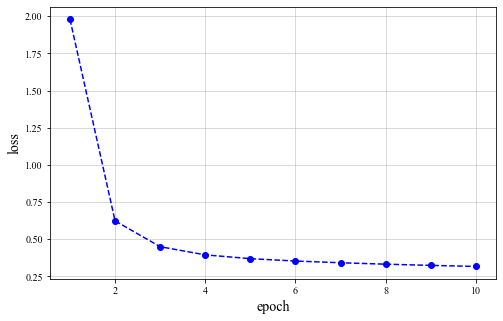

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(result_loss) + 1), result_loss, 'bo--')
plt.xlabel("epoch", fontsize = 14)
plt.ylabel("loss", fontsize = 14)
plt.grid(alpha = 0.6)
plt.show()

##  应用词嵌入模型

### 余弦相似度
$$
cos(\theta) = \frac{a\cdot{b}}{||a||\times||b||}
$$

In [45]:
def get_similar_tokens(query_token, k, embed):
    """词嵌入矩阵"""
    
    W = embed.weight.data
    x = W[token_to_idx[query_token]]
    # 添加的1e-9是为了数值稳定性(余弦相似度)
    
    cos = torch.matmul(W, x) / (torch.sum(W * W, dim=1) * torch.sum(x * x) + 1e-9).sqrt()
    _, topk = torch.topk(cos, k=k+1)
    topk = topk.cpu().numpy()
    
    for i in topk[1:]:  # 除去输入词
        print('cosine sim=%.3f: %s' % (cos[i], (idx_to_token[i])))
        
get_similar_tokens('chip', 3, net[0])

cosine sim=0.537: intel
cosine sim=0.526: ibm
cosine sim=0.481: machines


### Fiass查找
[Fiass - Faster search、Lower memory 、Run on GPUs](https://zhuanlan.zhihu.com/p/102281896)

In [48]:
# 通过使用快速的Embdedding相似度进行查找
def get_similar_tokens2faiss(token: str, topk = 5, embed = net[0]):
    
    lookup_table = embed.weight.data
    query_token = token
    x = lookup_table[token_to_idx[query_token]].view(1, -1).numpy()

    index = faiss.IndexFlatIP(embed_size)
    index.add(np.array(lookup_table))
    D, I = index.search(x=np.ascontiguousarray(x), k=topk)
    for i, (index, simi_value) in enumerate(zip(I[0], D[0])):
        if i == 0:
            continue
        print("sim dic: {}, value: {}".format(idx_to_token[index], simi_value))

In [49]:
get_similar_tokens2faiss(token = "chip", topk = 5, embed = net[0])

sim dic: flaws, value: 26.94745635986328
sim dic: intel, value: 22.954030990600586
sim dic: nugget, value: 22.86637306213379
sim dic: 30-share, value: 22.628337860107422


# 参考

[word2vec 中的数学原理详解(重点)](https://www.cnblogs.com/peghoty/p/3857839.html)  
[word2vec原理(一) CBOW与Skip-Gram模型基础](https://www.cnblogs.com/pinard/p/7160330.html)  
[深入理解word2vec](https://blog.csdn.net/abcdefg90876/article/details/109019876)  
[图解Word2vec，读这一篇就够了](https://blog.csdn.net/qq_28168421/article/details/90626469)  
[heatmap](https://blog.csdn.net/ztf312/article/details/102474190)  
[推荐系统 embedding 技术实践总结](https://zhuanlan.zhihu.com/p/143763320)  
[推荐系统的中 EMBEDDING 的应用实践](https://lumingdong.cn/application-practice-of-embedding-in-recommendation-system.html)  
[word2vec python实现](https://blog.csdn.net/weixin_32087115/article/details/100858423#commentBox)  
[Word2vec之公式推导笔记](https://plmsmile.github.io/2017/11/02/cs224n-lecture2-word2vec/)